<img src="Good_Reads_Photo.png" width="500" height="360">       <img src="Names_Photo.png" width="500" height="360">  

# Import Libraries

In [1]:
# Selenium
from selenium import webdriver
import undetected_chromedriver as uc
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import numpy as np
import traceback
import time

import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display, Markdown
from wordcloud import WordCloud
import random

import sklearn
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn import neighbors, tree, ensemble, naive_bayes, svm
# KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier


# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier


#  Neural Networks 
import tensorflow as tf
from tensorflow import keras
# Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.metrics import mean_absolute_error

# Text
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
from sklearn.feature_extraction.text import CountVectorizer

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Lasso
from sklearn.linear_model import Lasso

# Init The Lists of The DF

In [54]:
#Init
book_name=list()
author_name=list()
rating=list()
reviews=list()
stars=list()
num_of_pages=list()
publishing_year=list()
genres=list()
cover=list()
language=list()
serise=list()
genre_names=[]
ListOfBooks = []

#Init Back Up
B_book_name=list()
B_author_name=list()
B_rating=list()
B_reviews=list()
B_stars=list()
B_num_of_pages=list()
B_publishing_year=list()
B_genres=list()
B_cover=list()
B_language=list()
B_serise=list()

# GoodReads Login

In [6]:
driver = uc.Chrome()
driver.get("https://www.goodreads.com/")
driver.get("https://www.goodreads.com/ap/signin?language=en_US&openid.assoc_handle=amzn_goodreads_web_na&openid.claimed_id=http%3A%2F%2Fspecs.openid.net%2Fauth%2F2.0%2Fidentifier_select&openid.identity=http%3A%2F%2Fspecs.openid.net%2Fauth%2F2.0%2Fidentifier_select&openid.mode=checkid_setup&openid.ns=http%3A%2F%2Fspecs.openid.net%2Fauth%2F2.0&openid.pape.max_auth_age=0&openid.return_to=https%3A%2F%2Fwww.goodreads.com%2Fap-handler%2Fsign-in&siteState=0c81e74e138f99e1850c4e7d76840d6c")
with open('User.txt', 'r') as file:
    username = file.read().strip()
with open('p.txt', 'r') as file:
    password = file.read().strip()
driver.find_element("id", "ap_email").send_keys(username)
driver.find_element("id", "ap_password").send_keys(password)
driver.find_element("id", "signInSubmit").click()
time.sleep(5)
driver.get("https://www.goodreads.com/genres")

# Create List With All The Geners of The Website

In [ ]:
genres = driver.find_elements(By.CSS_SELECTOR,'.left')
for genre in genres:
    names = genre.text.split('\n')
    for name in names:
        genre_names.append(name)

# Starting The Real Thing - Scraping & Crawling (By Selenium)

In [ ]:
for i in genre_names:
    driver.get(f"https://www.goodreads.com/genres/{i}") # i= specific genre
    time.sleep(5)
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")  # Scroll down
    time.sleep(2)
    driver.find_element(By.PARTIAL_LINK_TEXT,'books...').click() # More books of the specific genre
    time.sleep(5)
    for pages in range(1,21):
        driver.get(f"https://www.goodreads.com/shelf/show/{i}?page={pages}")
        print("next page ",pages)
        time.sleep(5)
        Books = driver.find_elements(By.CSS_SELECTOR,'.bookTitle')
        for book_names in Books:
            name=book_names.get_attribute("href")
            ListOfBooks.append(name)
        for book in ListOfBooks:
            driver.get(book)
            time.sleep(2)
            try:
                driver.find_element(By.CSS_SELECTOR,".Text__title3.Text__italic")
                serise.append(True)
            except Exception as e:
                print(e)
                serise.append(False)
            B_serise=serise
            try:
                book_name.append(driver.find_element(By.CSS_SELECTOR,'[data-testid="bookTitle"').text)
            except:
                book_name.append("None")
            B_book_name=book_name
            try:
                author_name.append(driver.find_element(By.CSS_SELECTOR, '.ContributorLink__name').text)
            except:
                author_name.append("None")
            B_author_name=author_name
            try:
                stars.append(driver.find_element(By.CSS_SELECTOR, '.RatingStatistics__rating').text)
            except:
                stars.append("None")
            B_stars=stars
            try:
                rating_text=driver.find_element(By.CSS_SELECTOR, '[data-testid="ratingsCount"]').text
                rating_number = int(''.join(filter(str.isdigit, rating_text)))
                rating.append(rating_number)              
            except:
                rating.append("None")   
            B_rating=rating
            try:
                reviews_text=driver.find_element(By.CSS_SELECTOR, '[data-testid="reviewsCount"]').text
                reviews_number = int(''.join(filter(str.isdigit, reviews_text)))
                reviews.append(reviews_number)
            except:
                reviews.append("None")
            B_reviews=reviews
            #open more detail on the book
            try:
                button=driver.find_element(By.XPATH, '//button[contains(.,"Book details & editions")]')
                driver.execute_script("arguments[0].click();", button)
            except:
                print("nothing to see here")
            driver.execute_script("window.scrollTo(0, 600)") 
            time.sleep(3)
            result2 = { x.text.split("\n")[0]:x.text.split("\n")[1] for x in driver.find_elements(By.CSS_SELECTOR,".DescListItem")}
            if('Language' in result2):
                try:
                    language.append(result2['Language'])
                except:
                    language.append("None")
            else:
                language.append("None")
            B_language=language
            if('Format' in result2):
                try:
                    num_of_pages_text=result2['Format']
                    details=num_of_pages_text.split(',')
                    if(len(details)==2):
                        num_of_pages_number = int(''.join(filter(str.isdigit, details[0])))
                        num_of_pages.append(num_of_pages_number)
                        cover.append(details[1])
                    else:
                        num_of_pages.append(0)
                        cover.append("Unknown")
                except Exception as e:
                    traceback.print_exception(e)
                    num_of_pages.append(0)
                    cover.append("Unknown")
            else:
                num_of_pages.append(0)
                cover.append("Unknown")
            B_num_of_pages=num_of_pages
            B_cover=cover
            if('Published' in result2):
                try:
                    year=result2['Published']
                    yearNum = year.split(",")[-1].strip()
                    publishing_year.append(yearNum)
                except:
                    publishing_year.append("None")
            else:
                publishing_year.append("None")
            B_publishing_year=publishing_year
            genres.append(i)
            B_genres=genres
        ListOfBooks=[]
        df = pd.DataFrame(list(zip(B_book_name, B_author_name,B_genres,B_rating,B_reviews,B_stars,B_num_of_pages,B_cover,B_publishing_year,B_language,B_serise)), columns=["BookName", "AuthorName","genre","Rating","Reviews","Stars","Pages","BookCover","PublishingYear","Language","serise"])
            # Save to CSV file
        df.to_csv(f"Backup_{i}_{pages}.csv", index=False)
        B_book_name=list()
        B_author_name=list()
        B_rating=list()
        B_reviews=list()
        B_stars=list()
        B_num_of_pages=list()
        B_publishing_year=list()
        B_genres=list()
        B_cover=list()
        B_language=list()
        B_serise=list()
df = pd.DataFrame(list(zip(book_name, author_name,genres,rating,reviews,stars,num_of_pages,cover,publishing_year,language,serise)), columns=["BookName", "AuthorName","genre","Rating","Reviews","Stars","Pages","BookCover","PublishingYear","Language","serise"])
# Save to CSV file
df.to_csv("DF.csv", index=False)

# Load The Final Csv to DF

In [17]:
df= pd.read_csv('Full_DF.csv')
df_copy=df.copy()
df_copy # We will work with the copy of the original df

,BookName,AuthorName,Genre,Rating,Reviews,Stars,Pages,BookCover,PublishingYear,Language,Series
0,Ways of Seeing,John Berger,Art,347205.0,2452.0,3.92,176,Paperback,1990 by Penguin,English,False
1,The Story of Art,E.H. Gombrich,Art,393712.0,1309.0,3.96,688,Unknown Binding,1967 by Phaidon Press LTD,English,False
2,The New Drawing on the Right Side of the Brain,Betty Edwards,Art,342219.0,947.0,3.87,291,Paperback,1999 by Tarcher,English,False
3,Steal Like an Artist: 10 Things Nobody Told Yo...,Austin Kleon,Art,271177.0,8253.0,3.96,160,Paperback,2012 by Workman Publishing Company,English,False
4,The Artist's Way: A Spiritual Path to Higher C...,Julia Cameron,Art,106706.0,3805.0,3.94,237,Paperback,2002 by Jeremy P. Tarcher,English,True
...,...,...,...,...,...,...,...,...,...,...,...
38203,Take Me with You,Catherine Ryan Hyde,Travel,41458.0,3668.0,4.20,362,Paperback,2014 by Lake Union Publishing,NaN,False
38204,A Woman in the Polar Night,Christiane Ritter,Travel,1571.0,292.0,4.27,215,Paperback,2010 by University of Alaska Press,English,False
38205,"Jungleland: A Mysterious Lost City, a WWII Spy...",Christopher S. Stewart,Travel,1464.0,220.0,3.35,263,Hardcover,2013 by Harper,English,False
38206,A Sense of Direction: Pilgrimage for the Restl...,Gideon Lewis-Kraus,Travel,717.0,120.0,3.40,352,Hardcover,2012 by Riverhead Books,English,False


# Clean of The DataFrame

Cleaning by Book Name

In [18]:
#Delete The Rows That Have None Value in Column - BookName
df_copy['BookName'].replace(['None', 'none', 'NONE'], np.nan, inplace=True)
none_count = df_copy['BookName'].isnull().sum()
print("Before: Number of None values in BookName column:", none_count)
df_copy.dropna(subset=['BookName'], inplace=True)
none_count = df_copy['BookName'].isnull().sum()
print("After: Number of None values in BookName column:", none_count)

Before: Number of None values in BookName column: 130
After: Number of None values in BookName column: 0


Cleaning by Genre

In [19]:
#Replace the column that had undetected genre with the value in five next rows
count = df_copy[df_copy['Genre'].str.startswith('<undetected')]['Genre'].count()
print("Before: Number of values in 'Gener' column starting with '<undetected':", count)
while(count!=0):
    mark=df_copy[df_copy['Genre'].str.startswith('<undetected')]['Genre'].index[0]
    # Get the first row using the index
    value = df_copy.loc[mark, df_copy.columns[2]]
    value_Toreplace=df_copy.loc[mark+5, df_copy.columns[2]]
    df_copy=df_copy.replace(value,value_Toreplace)
    count=df_copy[df_copy['Genre'].str.startswith('<undetected')]['Genre'].count()
print("After : Number of values in 'Gener' column starting with '<undetected': ",count)

Before: Number of values in 'Gener' column starting with '<undetected': 60
After : Number of values in 'Gener' column starting with '<undetected':  0


Cleaning by Publish Year

In [20]:
# Extract only the numbers in the string at the column PublishingYear
df_copy['PublishingYear']=df_copy['PublishingYear'].str.replace('\D+', '')
none_count = df_copy['PublishingYear'].isnull().sum()
print("Before: Number of None values in 'PublishingYear' column:", none_count)
# Extract the 4 first digits of the year by using str[:4]
df_copy['PublishingYear'] = df_copy['PublishingYear'].astype(str).str[:4]
# Fill zero to NAN values that cannot be converted to numeric type
df_copy['PublishingYear'] = pd.to_numeric(df_copy['PublishingYear'] ,errors='coerce').fillna(0).astype(int)
# Sorting the publishing year as descending
df_copy.sort_values('PublishingYear', ascending=False, inplace=True)
# Remove all the rows that have zero on the PublishingYear
df_copy = df_copy.loc[df_copy['PublishingYear'] != 0]
none_count = df_copy['PublishingYear'].isnull().sum()
print("After: Number of None values in 'PublishingYear' column:", none_count)
# Remove books that there publishing year is under 1990
count_under_1990 = len(df_copy[df_copy['PublishingYear'] < 1990])
print(f"Before: Number of values in 'PublishingYear' column under 1990: {count_under_1990}")
df_copy = df_copy[df_copy['PublishingYear'] >= 1990]
count_under_1990 = len(df_copy[df_copy['PublishingYear'] < 1990])
print(f"After: Number of values in 'PublishingYear' column under 1990: {count_under_1990}")

Before: Number of None values in 'PublishingYear' column: 77
After: Number of None values in 'PublishingYear' column: 0
Before: Number of values in 'PublishingYear' column under 1990: 1465
After: Number of values in 'PublishingYear' column under 1990: 0


Cleaning by Language

In [21]:
# Updating the none values of language
most_common_language = df_copy['Language'].mode()[0]
print("most common language:" ,most_common_language )
# Replacing the rows that have none value in column - Language
df_copy['Language'].replace(['None', 'none', 'NONE'], np.nan, inplace=True)
none_count = df_copy['Language'].isnull().sum()
print("Before: Number of None values in 'Language' column:", none_count)
# Replaceing all the values that NAN with the most common language
df_copy['Language'].fillna(most_common_language, inplace=True)
none_count = df_copy['Language'].isnull().sum()
print("After: Number of None values in 'Language' column:", none_count)

most common language: English
Before: Number of None values in 'Language' column: 632
After: Number of None values in 'Language' column: 0


Transferring the series column to binary values

In [22]:
none_count = df_copy['Series'].isnull().sum()
print("Number of None values in 'Series' column:", none_count)
df_copy['Series'] = df_copy['Series'].replace({True: 1, False: 0})

Number of None values in 'Series' column: 0


Transferring the BookCover column to binary values

In [23]:
none_count = df_copy['BookCover'].isnull().sum()
print("Number of None values in 'BookCover' column:", none_count)
df_copy['BookCover'] = df_copy['BookCover'].astype(str)
df_copy['BookCover'] = df_copy['BookCover'].str.strip()
df_copy['BookCover']=np.where(df_copy['BookCover']=='Paperback',1,0)

Number of None values in 'BookCover' column: 0


Transferring the genre column to binary values

In [24]:
df_copy2=df_copy.copy()
# Extract unique genres from the 'genre' column
unique_genres = set(','.join(df_copy2['Genre']).split(','))

# Create genre columns dynamically
for genre in unique_genres:
    df_copy2[genre] = df_copy2['Genre'].apply(lambda x: 1 if genre in x else 0)

# Drop the original 'genre' column
df_copy2 = df_copy2.drop('Genre', axis=1)
df_copy2 = df_copy2.reset_index(drop=True)
df_copy2.to_csv("DF_copy_after_split_genre.csv",index=True)

Remove duplicates

In [25]:
duplicate_counts = df_copy2.duplicated(subset=['BookName', 'AuthorName', 'Stars', 'Pages', 'PublishingYear'], keep=False).sum()
print("Before: Number of duplicate rows:", duplicate_counts)
num_rows = df_copy2.shape[0]  # Using the shape attribute
print("Number of rows in df_copy2:", num_rows)
duplicate_rows = df_copy2[df_copy2.duplicated(subset=['BookName', 'AuthorName', 'Stars', 'Pages', 'PublishingYear'], keep=False)]

df_merge = duplicate_rows.groupby('BookName').max().reset_index()
num_rows = df_merge.shape[0]  # Using the shape attribute
print("Number of rows in df_merge:", num_rows)
df_merge.to_csv("df_merged.csv")

df_copy2 = df_copy2.drop_duplicates(subset=['BookName', 'AuthorName', 'Stars', 'Pages', 'PublishingYear'], keep=False)
frames = [df_copy2, df_merge]
df_copy = pd.concat(frames)

duplicate_counts = df_copy.duplicated(subset=['BookName', 'AuthorName', 'Stars', 'Pages', 'PublishingYear'], keep=False).sum()
print("After: Number of duplicate rows:", duplicate_counts)
num_rows = df_copy.shape[0]  # Using the shape attribute
print("Number of rows in df_copy:", num_rows)

df_copy.to_csv("df_copy.csv")

Before: Number of duplicate rows: 18711
Number of rows in df_copy2: 35006
Number of rows in df_merge: 6365
After: Number of duplicate rows: 0
Number of rows in df_copy: 22660


# Our Data After Cleaning

In [26]:
df_copy.to_csv("DF_copy.csv")
df_copy

,BookName,AuthorName,Rating,Reviews,Stars,Pages,BookCover,PublishingYear,Language,Series,...,Art,Young Adult,Religion,Christian,Horror,Suspense,Graphic Novels,Humor and Comedy,Spirituality,Science
1,Her Greatest Mistake,Hannah Cowan,7324.0,643.0,4.02,384,0,2023,English,1,...,0,0,0,0,0,0,0,0,0,0
4,How to Sell a Haunted House,Grady Hendrix,36626.0,7413.0,3.83,419,0,2023,English,0,...,0,0,0,0,1,0,0,0,0,0
6,Emily Wilde's Encyclopaedia of Faeries,Heather Fawcett,17206.0,4116.0,4.14,336,0,2023,English,1,...,0,0,0,0,0,0,0,0,0,0
8,The New Guy,Sarina Bowen,3159.0,580.0,4.18,346,1,2023,English,1,...,0,0,0,0,0,0,0,0,0,0
9,Jock Blocked,Pippa Grant,7596.0,791.0,4.27,337,0,2023,English,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6360,鬼滅の刃 10 [Kimetsu no Yaiba 10],Koyoharu Gotouge,11401.0,466.0,4.61,200,1,2018,Japanese,1,...,0,0,0,0,0,0,0,0,0,0
6361,鬼滅の刃 4 [Kimetsu no Yaiba 4],Koyoharu Gotouge,14306.0,568.0,4.53,192,1,2016,Japanese,1,...,0,0,0,0,0,0,0,0,0,0
6362,鬼滅の刃 6 [Kimetsu no Yaiba 6],Koyoharu Gotouge,11721.0,466.0,4.53,205,0,2017,Japanese,1,...,0,0,0,0,0,0,0,0,0,0
6363,鬼滅の刃 8 [Kimetsu no Yaiba 8],Koyoharu Gotouge,12738.0,860.0,4.68,199,0,2017,Japanese,1,...,0,0,0,0,0,0,0,0,0,0


# Did you know!?

<img src="Durms.png" width="360" height="260"> 

In [27]:
count_2023 = df_copy[df_copy['PublishingYear'] == 2023].shape[0]
output_size = 20
markdown_text = f"<span style='font-size:{output_size}px;'>That in our data frame we have {count_2023} books from 2023</span>"
display(Markdown(markdown_text))

<span style='font-size:20px;'>That in our data frame we have 111 books from 2023</span>

# EDA

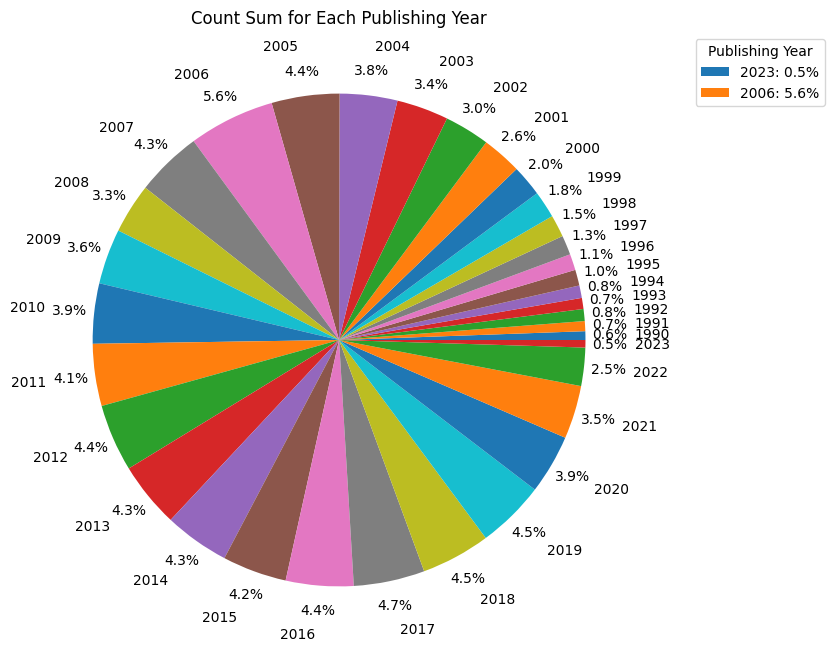

In [28]:
year_counts = df_copy['PublishingYear'].value_counts()

year_counts = year_counts.sort_index()

# Calculate the percentages
total = sum(year_counts)
percentages = [(count/total)*100 for count in year_counts]

# Find the min and max percentages
min_percent = min(percentages)
max_percent = max(percentages)

# Find number of the years that had min and max percentages 
min_year = year_counts.index[np.argmin(percentages)]
max_year = year_counts.index[np.argmax(percentages)]

plt.figure(figsize=(8, 8))
pie = plt.pie(year_counts.values, labels=year_counts.index, autopct='%.1f%%', pctdistance=1.1, labeldistance=1.2)

legend_labels = [f'{min_year}: {min_percent:.1f}%', f'{max_year}: {max_percent:.1f}%']
plt.legend(pie[0], legend_labels, title='Publishing Year', loc='upper right', bbox_to_anchor=(1.3, 1))

plt.title('Count Sum for Each Publishing Year')
plt.show()

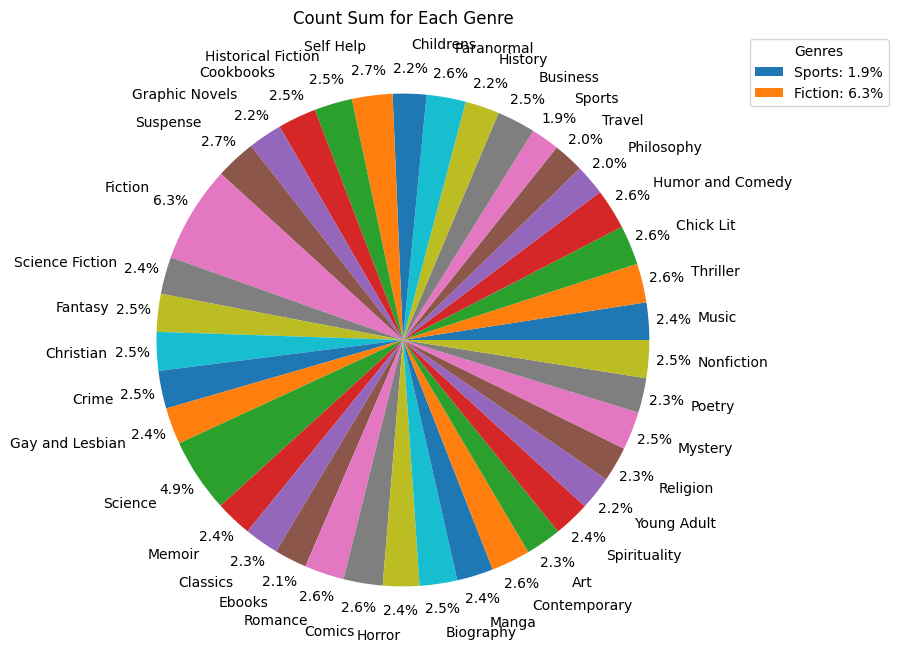

In [14]:
genre_counts = df_copy[['Music', 'Thriller', 'Chick Lit', 'Humor and Comedy', 'Philosophy', 'Travel', 'Sports', 'Business',
                   'History', 'Paranormal', 'Childrens', 'Self Help', 'Historical Fiction', 'Cookbooks',
                   'Graphic Novels', 'Suspense', 'Fiction', 'Science Fiction', 'Fantasy', 'Christian', 'Crime',
                   'Gay and Lesbian', 'Science', 'Memoir', 'Classics', 'Ebooks', 'Romance', 'Comics', 'Horror',
                   'Biography', 'Manga', 'Contemporary', 'Art', 'Spirituality', 'Young Adult', 'Religion',
                   'Mystery', 'Poetry', 'Nonfiction']].sum()

total = sum(genre_counts)
percentages = [(count/total)*100 for count in genre_counts]

min_percent = min(percentages)
max_percent = max(percentages)

# Find name the genres that have min and max percentages
min_genre = genre_counts.index[np.argmin(percentages)]
max_genre = genre_counts.index[np.argmax(percentages)]

plt.figure(figsize=(8, 8))
pie = plt.pie(genre_counts.values, labels=genre_counts.index, autopct='%.1f%%',pctdistance=1.1,labeldistance=1.2)

legend_labels = [f'{min_genre}: {min_percent:.1f}%', f'{max_genre}: {max_percent:.1f}%']
plt.legend(pie[0], legend_labels, title='Genres', loc='upper right', bbox_to_anchor=(1.3, 1))

plt.title('Count Sum for Each Genre')
plt.show()


### Fiction is the popular genre and the sport unpopular (by the number of books for each genre)

<Axes: xlabel='Stars', ylabel='Density'>

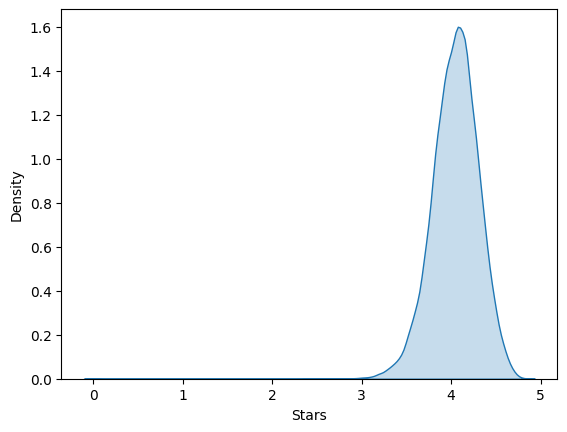

In [15]:
sns.kdeplot(df_copy['Stars'], fill=True)

### The number of stars that books received is in range 3 to 5

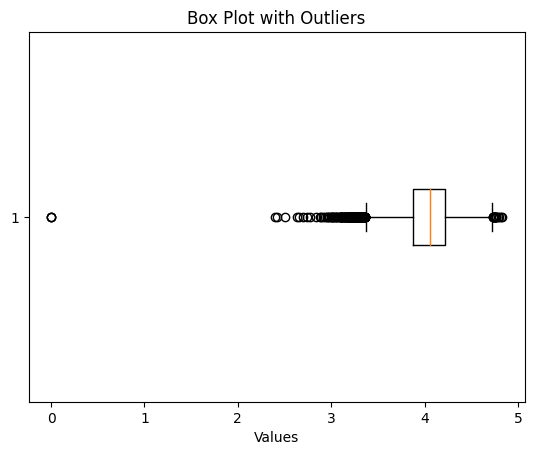

In [16]:
Q1 = np.percentile(df_copy['Stars'], 25)
Q3 = np.percentile(df_copy['Stars'], 75)
IQR = Q3 - Q1
IQR_range = 1.5 * IQR
outliers=(df_copy['Stars'] < Q1 - IQR_range) | (df_copy['Stars'] > Q3 + IQR_range)
plt.boxplot(df_copy['Stars'], vert=False, showfliers=True)

plt.xlabel('Values')
plt.title('Box Plot with Outliers')

plt.show()

### We noticed that we have an outliers so we decided to remove the books that have number of stars under 1

In [17]:
df_copy = df_copy[df_copy['Stars'] >= 1]

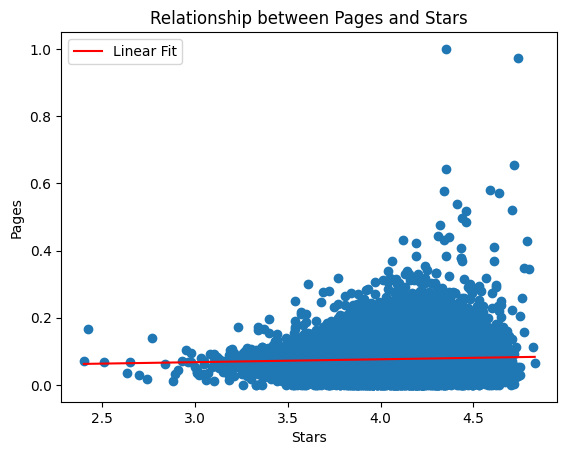

In [18]:
scaler = MinMaxScaler()

selected_columns = ['Pages']
scaled_columns = scaler.fit_transform(df_copy[selected_columns])

plt.scatter(df_copy['Stars'], scaled_columns)
plt.xlabel('Stars')
plt.ylabel('Pages')
plt.title('Relationship between Pages and Stars')

# Flatten the scaled_columns to ensure it is 1D
scaled_columns = scaled_columns.flatten()

# Fit a linear line to the data points
poly_coeffs = np.polyfit(df_copy['Stars'], scaled_columns, deg=1)
poly_line = np.poly1d(poly_coeffs)
x_vals = np.linspace(df_copy['Stars'].min(), df_copy['Stars'].max(), 100)
y_vals = poly_line(x_vals)

plt.plot(x_vals, y_vals, color='red', label='Linear Fit')

plt.legend()
plt.show()

### There is not relationship between the number of pages and the number of stars

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


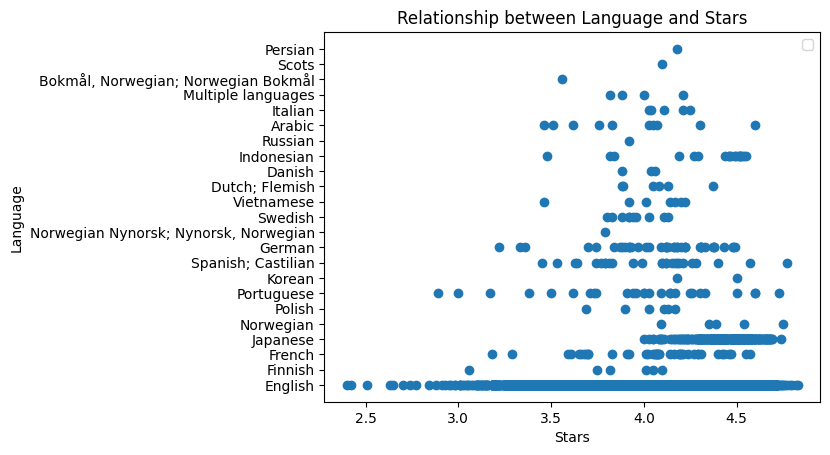

In [19]:
plt.scatter(df_copy['Stars'], df_copy['Language'])
plt.xlabel('Stars')
plt.ylabel('Language')
plt.title('Relationship between Language and Stars')

plt.legend()
plt.show()

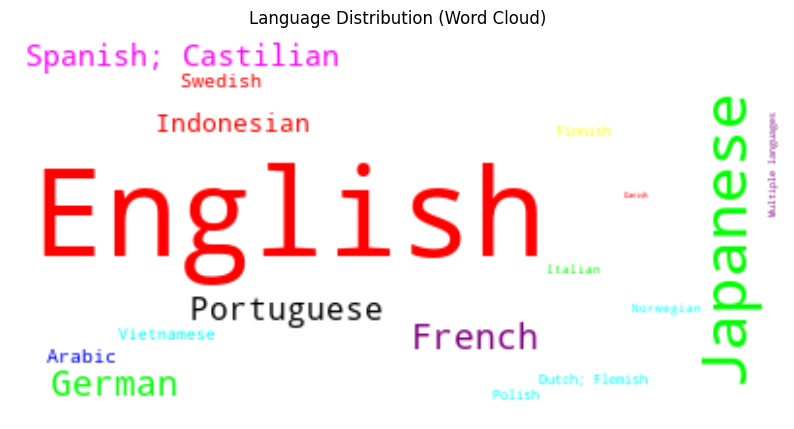

In [53]:
language_counts = df_copy['Language'].value_counts()

wordcloud = WordCloud(width=400, height=200, background_color='white').generate_from_frequencies(language_counts)

# Define custom colors for the words
colors = ['#FF0000', '#00FF00', '#0000FF', '#FF00FF', '#FFFF00', '#00FFFF', '#800080', '#000000']
wordcloud.recolor(color_func=lambda *args, **kwargs: random.choice(colors))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Language Distribution (Word Cloud)')
plt.savefig("wordcloud.png", bbox_inches='tight', dpi=300)

plt.show()

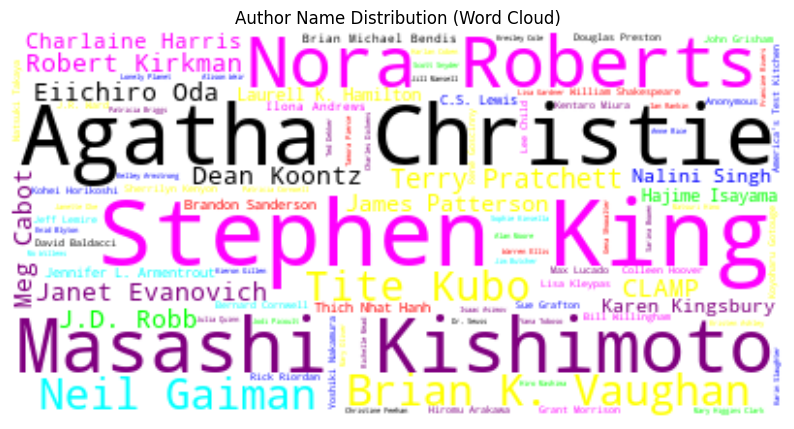

In [54]:
language_counts = df_copy['AuthorName'].value_counts()

wordcloud = WordCloud(width=400, height=200, background_color='white').generate_from_frequencies(language_counts)

# Define custom colors for the words
colors = ['#FF0000', '#00FF00', '#0000FF', '#FF00FF', '#FFFF00', '#00FFFF', '#800080', '#000000']
wordcloud.recolor(color_func=lambda *args, **kwargs: random.choice(colors))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Author Name Distribution (Word Cloud)')
plt.savefig("wordcloud.png", bbox_inches='tight', dpi=300)

plt.show()

Text(0, 0.5, 'Frequency')

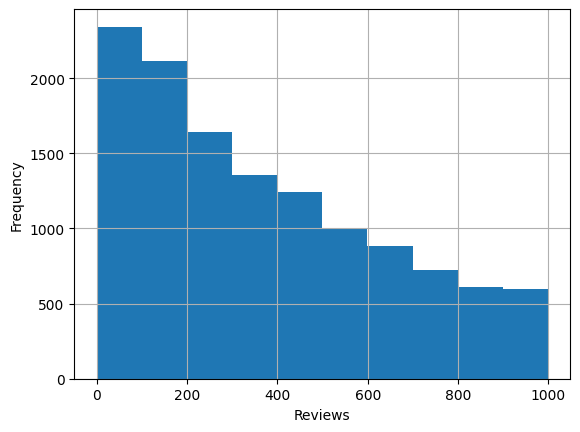

In [20]:
df_copy[df_copy['Reviews']<1000].Reviews.hist(bins=10)
plt.xlabel('Reviews')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

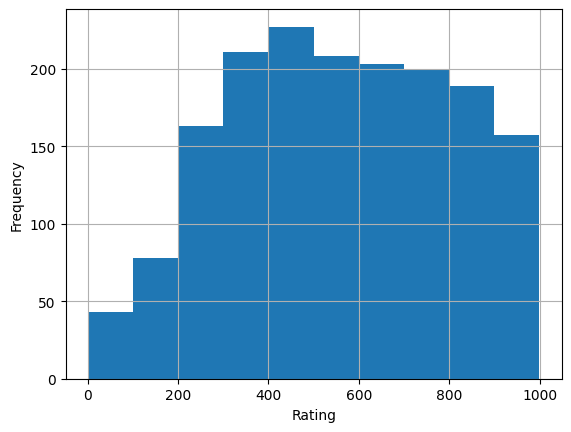

In [21]:
df_copy[df_copy['Rating']<1000].Rating.hist(bins=10)
plt.xlabel('Rating')
plt.ylabel('Frequency')

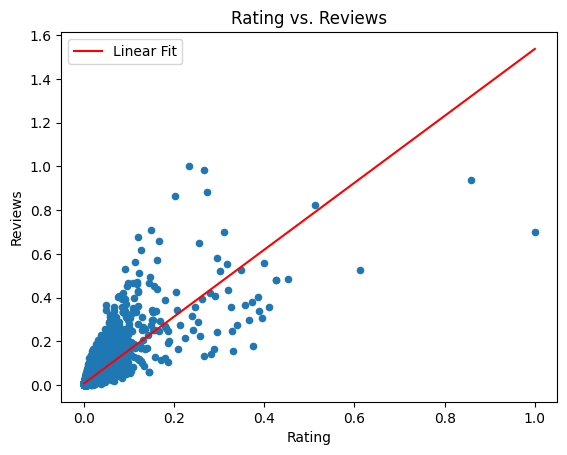

In [108]:
scaler = MinMaxScaler()

df_copy[['Rating', 'Reviews']] = scaler.fit_transform(df_copy[['Rating', 'Reviews']])

df_copy.plot(kind='scatter', x='Rating', y='Reviews', title='Rating vs. Reviews')

poly_coeffs = np.polyfit(df_copy['Rating'], df_copy['Reviews'], 1)
poly_line = np.poly1d(poly_coeffs)
x_vals = np.linspace(df_copy['Rating'].min(), df_copy['Rating'].max(), 100)
y_vals = poly_line(x_vals)

plt.plot(x_vals, y_vals, color='red', label='Linear Fit')
plt.legend()

plt.show()

### There is a linear relationship between the number of responses and the number of raters

In [78]:
genre_counts = df_copy[['Music', 'Thriller', 'Chick Lit', 'Humor and Comedy', 'Philosophy', 'Travel', 'Sports', 'Business',
                   'History', 'Paranormal', 'Childrens', 'Self Help', 'Historical Fiction', 'Cookbooks',
                   'Graphic Novels', 'Suspense', 'Fiction', 'Science Fiction', 'Fantasy', 'Christian', 'Crime',
                   'Gay and Lesbian', 'Science', 'Memoir', 'Classics', 'Ebooks', 'Romance', 'Comics', 'Horror',
                   'Biography', 'Manga', 'Contemporary', 'Art', 'Spirituality', 'Young Adult', 'Religion',
                   'Mystery', 'Poetry', 'Nonfiction']]

genre_sums = {}

# Iterate over the genres
for genre in genre_counts:
    genre_sum = 0
    genre_count = 0
    
    for index, row in df_copy.iterrows():
        if row[genre] == 1:
            genre_sum += row['Stars']
            genre_count += 1
    
    # Calculate the average star rating for the genre
    if genre_count > 0:
        genre_avg = genre_sum / genre_count
    else:
        genre_avg = 0
    
    genre_sums[genre] = genre_avg

# Create a new DataFrame from the genre sums dictionary
new_df = pd.DataFrame.from_dict(genre_sums, orient='index', columns=['average_rating'])



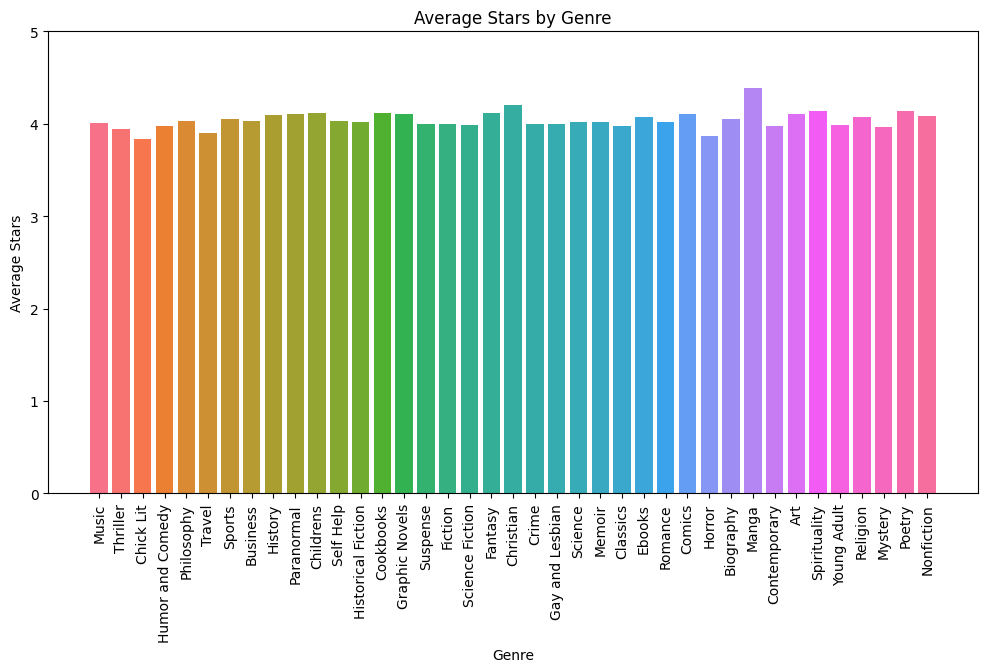

In [79]:
colors = sns.color_palette('husl', len(new_df))
plt.figure(figsize=(12, 6))
plt.bar(new_df.index, new_df['average_rating'], color=colors)
plt.xlabel('Genre')
plt.ylabel('Average Stars')
plt.title('Average Stars by Genre')
plt.xticks(rotation=90)
plt.ylim(0,5)
plt.show()

#### Heat Map

<Axes: >

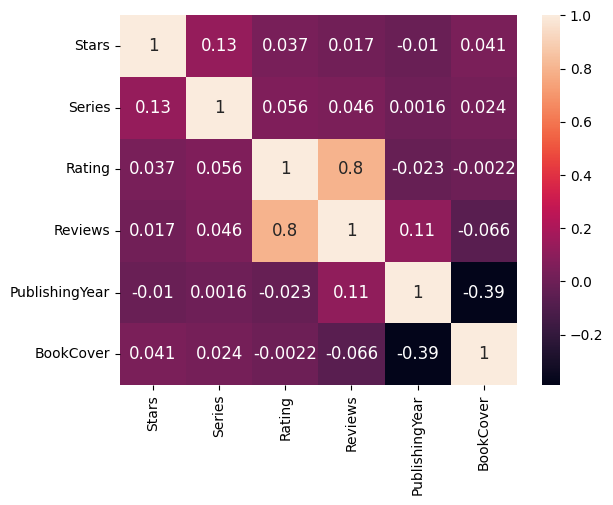

In [27]:
pok = pd.DataFrame(df_copy, columns = ["Stars","Series","Rating","Reviews","PublishingYear","BookCover"])
sns.heatmap(pok.corr(), annot=True,annot_kws={"size": 12})

### There is a strong relationship between the number of raters and the number of responses
### On the other hand, the relationship between our other columns is weak

# Machine Learning

### Linear Regression Model

In [29]:
objects = ['BookName', 'AuthorName', 'Language', 'BookCover', 'Stars']
TRAINING = df_copy.columns[df_copy.columns.isin(objects) == False]
TARGET= 'Stars'

X = df_copy[TRAINING]
y = df_copy[TARGET]
trained_model = LinearRegression().fit(X, y)
predicted_vals = trained_model.predict(X)

evaluate_value = metrics.r2_score(y, predicted_vals)
print("R-squared Score:", evaluate_value)
mae = mean_absolute_error(y, predicted_vals)
print("MAE for LinearRegression:",mae)


R-squared Score: 0.2235922159679422
MAE for LinearRegression: 0.17660721908075833


In [30]:
df_copy['Language']=np.where(df_copy['Language']=='English',1,0)
objects = ['BookName', 'AuthorName', 'Stars']

TRAINING = df_copy.columns[df_copy.columns.isin(objects) == False]
TARGET= 'Stars'

X = df_copy[TRAINING]
y = df_copy[TARGET]
trained_model = LinearRegression().fit(X, y)
predicted_vals = trained_model.predict(X)

evaluate_value = metrics.r2_score(y, predicted_vals)
print("R-squared Score:", evaluate_value)
mae = mean_absolute_error(y, predicted_vals)
print("MAE for LinearRegression:",mae)

R-squared Score: 0.22401721314412004
MAE for LinearRegression: 0.17654247299352005


#### We tried to include more columns ​​in the train model but it is barely improved the results

#### Let's try another models

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### KNN

In [58]:
df_copy2 = df_copy.copy()
columns_to_delete = ['BookName', 'AuthorName', 'Stars']
df_copy2.drop(columns_to_delete, axis=1, inplace=True)

X = df_copy2
y = df_copy['Stars']

k_values = [3, 5, 7, 9, 11, 13, 15]

# Create a dictionary of hyperparameters to search
param_grid = {'n_neighbors': k_values}

grid_search = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=param_grid, scoring='r2')

grid_search.fit(X_train, y_train)
predictions = grid_search.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print('Best k:', best_k)
print('R-squared Score:', best_score)
print("MAE for KNNRegressor:",mae)

Best k: 15
R-squared Score: 0.053728873751215225
MAE for KNNRegressor: 0.19488731979994117


### Decision Tree

In [32]:
clf=tree.DecisionTreeRegressor()
params={"max_depth":[2,4,6,8,10,15],"min_samples_split":[5,10,15,20,25,30]}
clf_cv=GridSearchCV(clf,params,scoring=make_scorer(metrics.r2_score,greater_is_better=True))
clf_cv.fit(X_train,y_train)
best_max_depth=clf_cv.best_params_.get('max_depth')
best_min_samples=clf_cv.best_params_.get('min_samples_split')
best_r2_val=clf_cv.best_score_
predictions = clf_cv.predict(X_test)
mae = mean_absolute_error(y_test, predictions)

print(f"best max depth={best_max_depth}")
print(f"best min samples={best_min_samples}")
print(f"R-squared Score:{best_r2_val}")
print("MAE for DecisionTreeRegressor:",mae)

best max depth=15
best min samples=30
R-squared Score:0.2203360561277436
MAE for DecisionTreeRegressor: 0.17545280358323206


### Random Forest

In [33]:
clf=RandomForestRegressor()
params={"n_estimators":[11,51,71]}
clfCV=GridSearchCV(clf,params,scoring=make_scorer(metrics.r2_score,greater_is_better=True))
clfCV.fit(X_train,y_train)
best_num_estimators=clfCV.best_params_.get('n_estimators')
best_f2_val=clfCV.best_score_
predictions = clfCV.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"best num estimators={best_num_estimators}")
print(f"R-squared Score:{best_f2_val}")
print("MAE for RandomForestRegressor:",mae)

best num estimators=71
R-squared Score:0.3303364721466703
MAE for RandomForestRegressor: 0.16029480501721718


### Lasso

In [284]:
X = df_copy
y = df_copy['Stars']
lasso_model = Lasso(alpha=0.1)  # alpha is the regularization strength
lasso_model.fit(X_train, y_train)
coefficients = lasso_model.coef_
intercept = lasso_model.intercept_
predictions = lasso_model.predict(X_test)
print("Coefficients:", coefficients)
print("Intercept:", intercept)
evaluate_value = metrics.r2_score(y_test, predictions)
print("R-squared Score:", evaluate_value)
mae = mean_absolute_error(y_test, predictions)
print("MAE for Lasso:",mae)

Coefficients: [ 0.00000000e+00  0.00000000e+00  7.53364984e-05  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00]
Intercept: 4.017917507847524
R-squared Score: 0.0021846673944593276
MAE for Lasso: 0.20264992214053718


### Neural Networks

In [34]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)])
model.compile(optimizer='adam', loss='mean_squared_error') # adam is an optimization algorithm commonly used in neural networks
model.fit(X_train, y_train, epochs=10, batch_size=32)  # epoch - one complete pass through the entire training dataset, batch - The amount of information that goes through in each iteration
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test,predictions)
print(f"R-squared Score:{r2}")
print(f"MAE for Neural Networks:{mae}")

Epoch 1/10
567/567 [==============================] - 1s 1ms/step - loss: 27.2526
Epoch 2/10
567/567 [==============================] - 1s 1ms/step - loss: 0.2096
Epoch 3/10
567/567 [==============================] - 1s 1ms/step - loss: 4.4213
Epoch 4/10
567/567 [==============================] - 1s 1ms/step - loss: 1.8562
Epoch 5/10
567/567 [==============================] - 1s 1ms/step - loss: 2.6087
Epoch 6/10
567/567 [==============================] - 1s 1ms/step - loss: 0.3603
Epoch 7/10
567/567 [==============================] - 1s 1ms/step - loss: 0.5732
Epoch 8/10
567/567 [==============================] - 1s 1ms/step - loss: 1.8132
Epoch 9/10
567/567 [==============================] - 1s 1ms/step - loss: 1.7997
Epoch 10/10
142/142 [==============================] - 0s 962us/step
R-squared Score:-21.960210102661502
MAE for Neural Networks:0.2683783482495179


### Unfortunately we saw that we are not able to predict the number of stars of a book
### We decided to do Scraping & Crawling again on the website GoodReads, to take data about 1 genre (Fiction). This time we will take also the summary of the books
### We will perform Machine learning on text

# init

In [ ]:
Summary = []
B_Summary=[]

# Starting The Scraping & Crawling (By Selenium)

In [ ]:
driver = uc.Chrome()
driver.get("https://www.goodreads.com/")
driver.get("https://www.goodreads.com/ap/signin?language=en_US&openid.assoc_handle=amzn_goodreads_web_na&openid.claimed_id=http%3A%2F%2Fspecs.openid.net%2Fauth%2F2.0%2Fidentifier_select&openid.identity=http%3A%2F%2Fspecs.openid.net%2Fauth%2F2.0%2Fidentifier_select&openid.mode=checkid_setup&openid.ns=http%3A%2F%2Fspecs.openid.net%2Fauth%2F2.0&openid.pape.max_auth_age=0&openid.return_to=https%3A%2F%2Fwww.goodreads.com%2Fap-handler%2Fsign-in&siteState=0c81e74e138f99e1850c4e7d76840d6c")
with open('User.txt', 'r') as file:
    username = file.read().strip()
with open('p.txt', 'r') as file:
    password = file.read().strip()
driver.find_element("id", "ap_email").send_keys(username)
driver.find_element("id", "ap_password").send_keys(password)
driver.find_element("id", "signInSubmit").click()
time.sleep(5)
driver.get("https://www.goodreads.com/genres")
driver.get(f"https://www.goodreads.com/genres/fiction") #gener specific
time.sleep(5)
driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")  #scroll down
time.sleep(2)
driver.find_element(By.PARTIAL_LINK_TEXT,'books...').click() #more books of the gener
time.sleep(5)
for page in range(10,21):
    driver.get(f"https://www.goodreads.com/shelf/show/fiction?page={page}")
    time.sleep(5)
    Books = driver.find_elements(By.CSS_SELECTOR,'.bookTitle')
    for book_names in Books:
        name=book_names.get_attribute("href")
        ListOfBooks.append(name)
    for book in ListOfBooks:
        driver.get(book)
        time.sleep(2)
        try:
            driver.find_element(By.CSS_SELECTOR,".Text.Text__title3.Text__italic")
            serise.append(True)
        except Exception as e:
            print(e)
            serise.append(False)
        print(serise)
        B_serise=serise
        try:
            book_name.append(driver.find_element(By.CSS_SELECTOR,'[data-testid="bookTitle"').text)
        except:
            book_name.append("None")
        B_book_name=book_name
        time.sleep(3)
        try:
            Summary.append(driver.find_element(By.CSS_SELECTOR,'.TruncatedContent_text.TruncatedContent_text--large').text)
        except:
            try:  
                Summary.append(driver.find_element(By.CSS_SELECTOR,'.DetailsLayoutRightParagraph').text)
            except:
                Summary.append("None")
        B_Summary=Summary
        print(B_Summary)
        try:
            author_name.append(driver.find_element(By.CSS_SELECTOR, '.ContributorLink__name').text)
        except:
            author_name.append("None")
        B_author_name=author_name
        try:
            stars.append(driver.find_element(By.CSS_SELECTOR, '.RatingStatistics__rating').text)
        except:
            stars.append("None")
        B_stars=stars
        try:
            rating_text=driver.find_element(By.CSS_SELECTOR, '[data-testid="ratingsCount"]').text
            rating_number = int(''.join(filter(str.isdigit, rating_text)))
            rating.append(rating_number)              
        except:
            rating.append("None")   
        B_rating=rating
        try:
            reviews_text=driver.find_element(By.CSS_SELECTOR, '[data-testid="reviewsCount"]').text
            reviews_number = int(''.join(filter(str.isdigit, reviews_text)))
            reviews.append(reviews_number)
        except:
            reviews.append("None")
        B_reviews=reviews
        #open more detail on the book
        try:
            button=driver.find_element(By.XPATH, '//button[contains(.,"Book details & editions")]')
            driver.execute_script("arguments[0].click();", button)
        except:
            print("nothing to see here")
        driver.execute_script("window.scrollTo(0, 600)") 
        time.sleep(3)
        result2 = { x.text.split("\n")[0]:x.text.split("\n")[1] for x in driver.find_elements(By.CSS_SELECTOR,".DescListItem")}
        if('Language' in result2):
            try:
                language.append(result2['Language'])
            except:
                language.append("None")
        else:
            language.append("None")
        B_language=language
        if('Format' in result2):
            try:
                num_of_pages_text=result2['Format']
                details=num_of_pages_text.split(',')
                if(len(details)==2):
                    num_of_pages_number = int(''.join(filter(str.isdigit, details[0])))
                    num_of_pages.append(num_of_pages_number)
                    cover.append(details[1])
                else:
                    num_of_pages.append(0)
                    cover.append("Unknown")
            except Exception as e:
                traceback.print_exception(e)
                num_of_pages.append(0)
                cover.append("Unknown")
        else:
            num_of_pages.append(0)
            cover.append("Unknown")
        B_num_of_pages=num_of_pages
        B_cover=cover
        if('Published' in result2):
            try:
                year=result2['Published']
                yearNum = year.split(",")[-1].strip()
                publishing_year.append(yearNum)
            except:
                publishing_year.append("None")
        else:   
            publishing_year.append("None")
        B_publishing_year=publishing_year
        genres.append("fiction")
        B_genres=genres
    ListOfBooks=[]
    df = pd.DataFrame(list(zip(B_book_name, B_author_name,B_genres,B_rating,B_reviews,B_stars,B_num_of_pages,B_cover,B_publishing_year,B_language,B_serise,B_Summary)), columns=["BookName", "AuthorName","genre","Rating","Reviews","Stars","Pages","BookCover","PublishingYear","Language","serise","Summary"])
    # Save to CSV file
    df.to_csv(f"Backup_fiction_{page}.csv", index=False)
    B_book_name=list()
    B_author_name=list()
    B_rating=list()
    B_reviews=list()
    B_stars=list()
    B_num_of_pages=list()
    B_publishing_year=list()
    B_genres=list()
    B_cover=list()
    B_language=list()
    B_serise=list()
    B_Summary=[]
df = pd.DataFrame(list(zip(book_name, author_name,genres,rating,reviews,stars,num_of_pages,cover,publishing_year,language,serise,Summary)), columns=["BookName", "AuthorName","genre","Rating","Reviews","Stars","Pages","BookCover","PublishingYear","Language","serise","Summary"])
# Save to CSV file
df.to_csv("DF.csv", index=False)

# Load the DF with the summary csv to DF

In [181]:
data_frame = pd.read_csv('DFWithSummary.csv')
df_copy2=data_frame.copy()
df_copy2

,BookName,AuthorName,Genre,Rating,Reviews,Stars,Pages,BookCover,PublishingYear,Language,Series,Summary
0,The Immortalists,Chloe Benjamin,fiction,195086,19263,3.71,346,Hardcover,2018 by G.P. Putnam's Sons,English,False,"If you knew the date of your death, how would ..."
1,Small Great Things,Jodi Picoult,fiction,341940,30185,4.35,510,Kindle Edition,2016 by Ballantine Books,English,True,Ruth Jefferson is a labor and delivery nurse a...
2,Transcendent Kingdom,Yaa Gyasi,fiction,134427,15512,4.12,264,Hardcover,2020 by Knopf,English,False,Yaa Gyasi's stunning follow-up to her acclaime...
3,Stranger in a Strange Land,Robert A. Heinlein,fiction,303859,9448,3.92,525,Paperback,1991 by Ace,English,False,NAME: Valentine Michael Smith\nANCESTRY: Human...
4,The Absolutely True Diary of a Part-Time Indian,Sherman Alexie,fiction,259563,26655,4.07,230,Hardcover,Brown Books for Young Readers,English,False,Bestselling author Sherman Alexie tells the st...
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Before the Coffee Gets Cold,Toshikazu Kawaguchi,fiction,253025,37359,3.73,213,Paperback,2019 by Picador,English,True,What would you change if you could go back in ...
996,Anansi Boys,Neil Gaiman,fiction,215415,11347,4.04,387,Mass Market Paperback,2006 by HarperCollins HarperTorch,English,True,God is dead. Meet the kids.\n\nFat Charlie Nan...
997,Choke,Chuck Palahniuk,fiction,204401,6864,3.70,293,Paperback,2002 by Anchor Books,English,False,"Victor Mancini, a medical-school dropout, is a..."
998,Giovanni's Room,James Baldwin,fiction,121820,12963,4.31,224,Paperback,1988 by Laurel,English,False,Set in the contemporary Paris of American exp...


# Clean of The DataFrame

Cleaning by Book Name

In [182]:
#Delete The Rows That Have None Value in Column - BookName
df_copy2['BookName'].replace(['None', 'none', 'NONE'], np.nan, inplace=True)
none_count = df_copy2['BookName'].isnull().sum()
print("Before: Number of None values in BookName column:", none_count)
df_copy2.dropna(subset=['BookName'], inplace=True)
none_count = df_copy2['BookName'].isnull().sum()
print("After: Number of None values in BookName column:", none_count)

Before: Number of None values in BookName column: 0
After: Number of None values in BookName column: 0


Cleaning by Genre

In [183]:
#Replace the column that had undetected genre with the value in five next rows
count = df_copy2[df_copy2['Genre'].str.startswith('<undetected')]['Genre'].count()
print("Before: Number of values in 'Gener' column starting with '<undetected':", count)
while(count!=0):
    mark=df_copy2[df_copy2['Genre'].str.startswith('<undetected')]['Genre'].index[0]
    # Get the first row using the index
    value = df_copy2.loc[mark, df_copy2.columns[2]]
    value_Toreplace=df_copy2.loc[mark+5, df_copy2.columns[2]]
    df_copy2=df_copy2.replace(value,value_Toreplace)
    count=df_copy2[df_copy2['Genre'].str.startswith('<undetected')]['Genre'].count()
print("After : Number of values in 'Gener' column starting with '<undetected': ",count)

Before: Number of values in 'Gener' column starting with '<undetected': 0
After : Number of values in 'Gener' column starting with '<undetected':  0


Cleaning by Publish Year

In [184]:
# Extract only the numbers in the string at the column PublishingYear
df_copy2['PublishingYear']=df_copy2['PublishingYear'].str.replace('\D+', '')
none_count = df_copy2['PublishingYear'].isnull().sum()
print("Before: Number of None values in 'PublishingYear' column:", none_count)
# Extract the 4 first digits of the year by using str[:4]
df_copy2['PublishingYear'] = df_copy2['PublishingYear'].astype(str).str[:4]
# Fill zero to NAN values that cannot be converted to numeric type
df_copy2['PublishingYear'] = pd.to_numeric(df_copy2['PublishingYear'] ,errors='coerce').fillna(0).astype(int)
# Sorting the publishing year as descending
df_copy2.sort_values('PublishingYear', ascending=False, inplace=True)
# Remove all the rows that have zero on the PublishingYear
df_copy2 = df_copy2.loc[df_copy2['PublishingYear'] != 0]
none_count = df_copy2['PublishingYear'].isnull().sum()
print("After: Number of None values in 'PublishingYear' column:", none_count)
# Remove books that there publishing year is under 1990
count_under_1990 = len(df_copy2[df_copy2['PublishingYear'] < 1990])
print(f"Before: Number of values in 'PublishingYear' column under 1990: {count_under_1990}")
df_copy2 = df_copy2[df_copy2['PublishingYear'] >= 1990]
count_under_1990 = len(df_copy2[df_copy2['PublishingYear'] < 1990])
print(f"After: Number of values in 'PublishingYear' column under 1990: {count_under_1990}")

Before: Number of None values in 'PublishingYear' column: 2
After: Number of None values in 'PublishingYear' column: 0
Before: Number of values in 'PublishingYear' column under 1990: 36
After: Number of values in 'PublishingYear' column under 1990: 0


Cleaning by Language

In [185]:
# Updating the none values of language
most_common_language = df_copy2['Language'].mode()[0]
print("most common language:" ,most_common_language )
# Replacing the rows that have none value in column - Language
df_copy2['Language'].replace(['None', 'none', 'NONE'], np.nan, inplace=True)
none_count = df_copy2['Language'].isnull().sum()
print("Before: Number of None values in 'Language' column:", none_count)
# Replaceing all the values that NAN with the most common language
df_copy2['Language'].fillna(most_common_language, inplace=True)
none_count = df_copy2['Language'].isnull().sum()
print("After: Number of None values in 'Language' column:", none_count)

most common language: English
Before: Number of None values in 'Language' column: 1
After: Number of None values in 'Language' column: 0


Transferring the series column to binary values

In [186]:
none_count = df_copy2['Series'].isnull().sum()
print("Number of None values in 'Series' column:", none_count)
df_copy2['Series'] = df_copy2['Series'].replace({True: 1, False: 0})

Number of None values in 'Series' column: 0


Transferring the BookCover column to binary values

In [187]:
none_count = df_copy2['BookCover'].isnull().sum()
print("Number of None values in 'BookCover' column:", none_count)
df_copy2['BookCover'] = df_copy2['BookCover'].astype(str)
df_copy2['BookCover'] = df_copy2['BookCover'].str.strip()
df_copy2['BookCover']=np.where(df_copy2['BookCover']=='Paperback',1,0)

Number of None values in 'BookCover' column: 0


Remove Duplicates

In [188]:
duplicate_counts = df_copy2.duplicated(subset=['BookName', 'AuthorName', 'Stars', 'Pages', 'PublishingYear'], keep=False).sum()
print("Before: Number of duplicate rows:", duplicate_counts)
num_rows = df_copy2.shape[0]  # Using the shape attribute
print("Number of rows in df_copy:", num_rows)

df_copy2.drop_duplicates(subset=['BookName', 'AuthorName', 'Stars', 'Pages', 'PublishingYear'], keep=False, inplace=True)
df_copy2.dropna(axis=0,inplace=True)
duplicate_counts = df_copy2.duplicated(subset=['BookName', 'AuthorName', 'Stars', 'Pages', 'PublishingYear'], keep=False).sum()
print("After: Number of duplicate rows:", duplicate_counts)
num_rows = df_copy2.shape[0]  # Using the shape attribute
print("Number of rows in df_copy:", num_rows)

Before: Number of duplicate rows: 2
Number of rows in df_copy: 919
After: Number of duplicate rows: 0
Number of rows in df_copy: 917


# Our Data After Cleaning

In [189]:
df_copy2

,BookName,AuthorName,Genre,Rating,Reviews,Stars,Pages,BookCover,PublishingYear,Language,Series,Summary
967,"Beautiful World, Where Are You",Sally Rooney,fiction,320591,38077,3.55,337,1,2023,English,0,*The Sunday Times and Global number one bestse...
203,Throne of Glass,Sarah J. Maas,fiction,1040345,70370,4.19,432,1,2023,English,1,An alternative cover edition for this ISBN can...
818,Bel Canto,Ann Patchett,fiction,270688,17445,3.93,318,1,2023,English,0,"Somewhere in South America, at the home of the..."
32,Book Lovers,Emily Henry,fiction,715213,86163,4.19,377,0,2022,English,0,One summer. Two rivals. A plot twist they didn...
839,Lessons in Chemistry,Bonnie Garmus,fiction,567138,56706,4.34,400,0,2022,English,0,Alternate cover edition of ISBN 9780385547345....
...,...,...,...,...,...,...,...,...,...,...,...,...
777,A Prayer for Owen Meany,John Irving,fiction,311682,15669,4.24,637,1,1990,English,0,"Eleven-year-old Owen Meany, playing in a Littl..."
186,Hyperion,Dan Simmons,fiction,232206,11259,4.25,500,0,1990,English,1,"On the world called Hyperion, beyond the law o..."
867,Ulysses,James Joyce,fiction,123081,8779,3.75,783,1,1990,English,0,"Loosely based on the Odyssey, this landmark of..."
981,The Eye of the World,Robert Jordan,fiction,499845,21035,4.19,800,0,1990,English,1,The Wheel of Time turns and Ages come and pass...


# Pre Process The Summary

In [190]:
nltk.download('punkt')  
nltk.download('stopwords')

def preprocess_text(text):
    # Tokenize the text into individual words
    tokens = word_tokenize(text)
    
    # Remove punctuation
    tokens = [word for word in tokens if word not in string.punctuation]
    
    # Convert to lowercase
    tokens = [word.lower() for word in tokens]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    # Join the processed tokens back into a single string
    processed_text = ' '.join(tokens)
    
    return processed_text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Construction of the matrix vectors

In [191]:
df_copy2['Summary'] = df_copy2['Summary'].apply(preprocess_text)
df_copy2['Summary'].to_csv('dfofsummaries.csv',index=False) 
summary_list = df_copy2['Summary'].dropna().astype(str).tolist()  

# Initialize the CountVectorizer
vectorizer = CountVectorizer(stop_words="english")
# Fit and transform the documents
freq_vec = vectorizer.fit_transform(summary_list).toarray()
# Get the feature names (tokens)
feature_names = dict(zip(vectorizer.get_feature_names_out(),freq_vec.sum(axis=0)))
feature_names=dict(sorted(feature_names.items(), key=lambda item: item[1],reverse=True))
feature_names = dict((key, value) for key, value in feature_names.items()if value != 0)

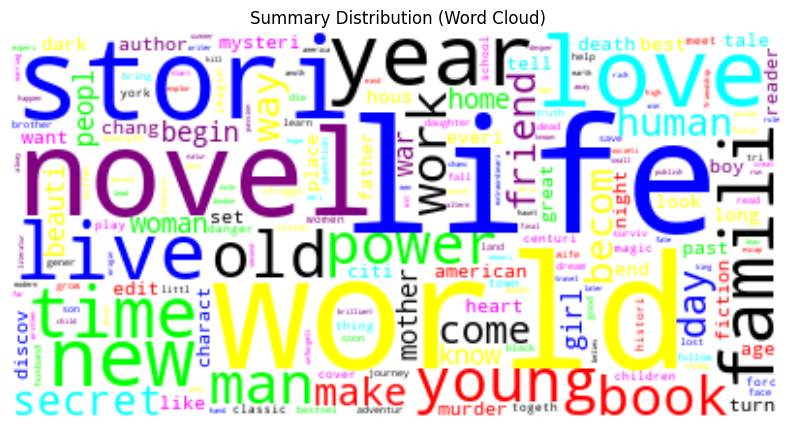

In [118]:
wordcloud = WordCloud(width=400, height=200, background_color='white').generate_from_frequencies(feature_names)

# Define custom colors for the words
colors = ['#FF0000', '#00FF00', '#0000FF', '#FF00FF', '#FFFF00', '#00FFFF', '#800080', '#000000']
wordcloud.recolor(color_func=lambda *args, **kwargs: random.choice(colors))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Summary Distribution (Word Cloud)')
plt.savefig("wordcloud.png", bbox_inches='tight', dpi=300)

plt.show()

# Machine Learning

In [119]:
X_numerical = df_copy2[['AuthorName','BookName','Rating', 'Reviews', 'Pages', 'PublishingYear','BookCover','Language','Series']]
X_numerical.reset_index(drop=True, inplace=True) #we reset the index because we don't want to have duplicate in the indexes
X = pd.concat([pd.DataFrame(X_numerical), pd.DataFrame(feature_names,index= range(freq_vec.shape[0]))], axis=1)
y = df_copy2['Stars']
print("x numric" , X_numerical.shape)
print("x shape ", X.shape)
print("y shape ", y.shape)

x numric (917, 9)
x shape  (917, 11848)
y shape  (917,)


In [120]:
X['Language']=np.where(X['Language']=='English',1,0)
X =  X.drop(columns=['BookName', 'AuthorName'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [49]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluate_value = metrics.r2_score(y_test, y_pred)
print("R-squared Score:", evaluate_value)
mae = mean_absolute_error(y_test, y_pred)
print("MAE for Linear Regression:",mae)

R-squared Score: 0.255430811509616
MAE for Linear Regression: 0.1760189164713042


### KNN

In [50]:
k_values = [3, 5, 7, 9, 11, 13, 15]
param_grid = {'n_neighbors': k_values}
grid_search = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=param_grid, scoring='r2')
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_
print('Best k:', best_k)
print('R-squared Score:', best_score)
mae = mean_absolute_error(y_test, y_pred)
print("MAE for KNeighborsRegressor:", mae)

Best k: 15
R-squared Score: 0.04696214830053389
MAE for KNeighborsRegressor: 0.19793115942028983


### Decision Tree

In [51]:
clf=tree.DecisionTreeRegressor()
params={"max_depth":[2,4,6,8,10,15],"min_samples_split":[5,10,15,20,25,30]}
clf_cv=GridSearchCV(clf,params,scoring=make_scorer(metrics.r2_score,greater_is_better=True))
clf_cv.fit(X_train,y_train)
y_pred = clf_cv.predict(X_test)
best_max_depth=clf_cv.best_params_.get('max_depth')
best_min_samples=clf_cv.best_params_.get('min_samples_split')
best_r2_val=clf_cv.best_score_
print(f"best max depth={best_max_depth}")
print(f"best min samples={best_min_samples}")
print(f"R-squared Score:{best_r2_val}")
mae = mean_absolute_error(y_test, y_pred)
print("MAE for DecisionTreeRegressor:",mae)

best max depth=4
best min samples=30
R-squared Score:0.07707798995902367
MAE for DecisionTreeRegressor: 0.18804612698229375


### Random Forest

In [52]:
clf=RandomForestRegressor()
params={"n_estimators":[11,51,71]}
clfCV=GridSearchCV(clf,params,scoring=make_scorer(metrics.r2_score,greater_is_better=True))
clfCV.fit(X_train,y_train)
y_pred = clfCV.predict(X_test)
best_num_estimators=clfCV.best_params_.get('n_estimators')
best_f2_val=clfCV.best_score_
print(f"best num estimators={best_num_estimators}")
print(f"R-squared Score:{best_f2_val}")
mae = mean_absolute_error(y_test, y_pred)
print("MAE for RandomForestRegressor:",mae)

best num estimators=71
R-squared Score:0.12514864204460996
MAE for RandomForestRegressor: 0.17397504592774027


### Lasso

In [53]:
lasso_model = Lasso(alpha=0.1)  # alpha is the regularization strength
lasso_model.fit(X_train, y_train)
coefficients = lasso_model.coef_
intercept = lasso_model.intercept_
y_pred = lasso_model.predict(X_test)
print("Coefficients:", coefficients)
print("Intercept:", intercept)
evaluate_value = metrics.r2_score(y_test, y_pred)
print("R-squared Score:", evaluate_value)
mae = mean_absolute_error(y_test, y_pred)
print("MAE for Lasso:",mae)

Coefficients: [4.29432455e-08 1.58537997e-06 2.98509023e-04 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Intercept: 3.83486972337234
R-squared Score: 0.22222884336744564
MAE for Lasso: 0.17997440359737815


### Neural Networks

In [54]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)])
model.compile(optimizer='adam', loss='mean_squared_error') # adam is an optimization algorithm commonly used in neural networks
model.fit(X_train, y_train, epochs=10, batch_size=32)  # epoch - one complete pass through the entire training dataset, batch - The amount of information that goes through in each iteration
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test,predictions)
print(f"R-squared Score:{r2}")
print(f"MAE for Neural Networks:{mae}")

Epoch 1/10
23/23 [==============================] - 1s 10ms/step - loss: 1425870.6250
Epoch 2/10
23/23 [==============================] - 0s 11ms/step - loss: 344986.3125
Epoch 3/10
23/23 [==============================] - 0s 10ms/step - loss: 85540.8750
Epoch 4/10
23/23 [==============================] - 0s 10ms/step - loss: 197411.7344
Epoch 5/10
23/23 [==============================] - 0s 9ms/step - loss: 34576.5195
Epoch 6/10
23/23 [==============================] - 0s 10ms/step - loss: 19028.3086
Epoch 7/10
23/23 [==============================] - 0s 9ms/step - loss: 903.2013
Epoch 8/10
23/23 [==============================] - 0s 9ms/step - loss: 314.7667
Epoch 9/10
23/23 [==============================] - 0s 9ms/step - loss: 154.6970
Epoch 10/10
6/6 [==============================] - 0s 3ms/step
R-squared Score:-1135.777707787406
MAE for Neural Networks:7.246497520605993


### Unfortunately it didn't work
### We decided to change from a regression problem to a classification problem
### Now we will classify whether a book received a low, medium or high stars rating 

# Machine Learning

### Classification Problem

In [93]:
# Define the bins
bin_edges = [1, 2, 4, 5]
bin_labels = ['Low', 'Medium', 'High']

# Apply binning to the 'Stars' column
df_copy['Stars_category'] = pd.cut(df_copy['Stars'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Original code
objects = ['BookName', 'AuthorName', 'Stars', 'Stars_category','Language']
TRAINING = df_copy.columns[df_copy.columns.isin(objects) == False]
TARGET = 'Stars_category'

# Updated code
X = df_copy[TRAINING]
y = df_copy[TARGET]
nan_indices = y.isnull()

X = X[~nan_indices]
y = y[~nan_indices]


# Map categorical labels to numeric values
label_mapping = {label: i for i, label in enumerate(bin_labels)}
y = y.map(label_mapping)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### KNN

In [28]:
clf = KNeighborsClassifier()
params = {"n_neighbors": [3, 7, 9, 11]}
clf_cv = GridSearchCV(clf, params, scoring='f1_macro')
clf_cv.fit(X_train, y_train)
y_pred = clf_cv.predict(X_test)
best_K = clf_cv.best_params_["n_neighbors"]
best_f1_val = clf_cv.best_score_
print('Best k:', best_K)
print('F1 Score:', best_f1_val)
mae = mean_absolute_error(y_test, y_pred)
print("MAE for KNeighborsClassifier:", mae)

Best k: 7
F1 Score: 0.5553987231799725
MAE for KNeighborsClassifier: 0.42961165048543687


### Decision Tree

In [33]:
clf=tree.DecisionTreeClassifier()
params={"max_depth":[2,4,6],"min_samples_split":[5,10,20]}
clf_cv=GridSearchCV(clf,params,scoring=make_scorer(metrics.f1_score,greater_is_better=True))
clf_cv.fit(X_train,y_train)
y_pred = clf_cv.predict(X_test)
best_max_depth=clf_cv.best_params_.get('max_depth')
best_min_samples=clf_cv.best_params_.get('min_samples_split')
best_f1_val=clf_cv.best_score_
print(f"best max depth={best_max_depth}")
print(f"best min samples={best_min_samples}")
print(f"F1-squared Score:{best_f1_val}")
mae = mean_absolute_error(y_test, y_pred)
print("MAE for DecisionTreeClassifier:",mae)

best max depth=6
best min samples=5
F1-squared Score:0.2637293417588469
MAE for DecisionTreeClassifier: 0.36738746690203


### RandomForest

In [34]:
clf=RandomForestClassifier()
params={"n_estimators":[11,51,71]}
clf_cv=GridSearchCV(clf,params,scoring=make_scorer(metrics.f1_score,greater_is_better=True))
clf_cv.fit(X_train,y_train)
y_pred = clf_cv.predict(X_test)
best_num_estimators=clf_cv.best_params_.get('n_estimators')
best_f1_val=clf_cv.best_score_
print(f"best num estimators={best_num_estimators}")
print(f"F1-squared Score:{best_f1_val}")
mae = mean_absolute_error(y_test, y_pred)
print("MAE for RandomForestClassifier:",mae)

best num estimators=71
F1-squared Score:0.6290032791977884
MAE for RandomForestClassifier: 0.28949691085613416


### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
trained_model = LogisticRegression().fit(X_train, y_train)
predicted_vals = trained_model.predict(X_test)
evaluate_value = f1_score(y_test, predicted_vals)
print(f"F1-squared Score:{evaluate_value}")
mae = mean_absolute_error(y_test, predicted_vals)
print("MAE for Logistic Regression:",mae)

F1-squared Score:0.007486631016042781
MAE for Logistic Regression: 0.4095322153574581


### Neural Networks

In [37]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)
predictions = model.predict(X_test)
rounded_predictions = np.round(predictions)
mae = mean_absolute_error(y_test, predictions)
f1 = f1_score(y_test, rounded_predictions)
print(f"F1 Score: {f1}")
print(f"MAE for Neural Networks:{mae}")

Epoch 1/10
567/567 [==============================] - 1s 1ms/step - loss: -6019605.5000 - accuracy: 0.4267
Epoch 2/10
567/567 [==============================] - 1s 1ms/step - loss: -88007520.0000 - accuracy: 0.4267
Epoch 3/10
567/567 [==============================] - 1s 2ms/step - loss: -353914496.0000 - accuracy: 0.4267
Epoch 4/10
567/567 [==============================] - 1s 1ms/step - loss: -842444864.0000 - accuracy: 0.4267
Epoch 5/10
567/567 [==============================] - 1s 1ms/step - loss: -1597533824.0000 - accuracy: 0.4267
Epoch 6/10
567/567 [==============================] - 1s 2ms/step - loss: -2644537856.0000 - accuracy: 0.4267
Epoch 7/10
567/567 [==============================] - 1s 1ms/step - loss: -4002578176.0000 - accuracy: 0.4267
Epoch 8/10
567/567 [==============================] - 1s 2ms/step - loss: -5689115136.0000 - accuracy: 0.4267
Epoch 9/10
567/567 [==============================] - 1s 1ms/step - loss: -7745568768.0000 - accuracy: 0.4267
Epoch 10/10
142/1

### Naive Base

In [39]:
gnb = GaussianNB()

gnb.fit(X_train,y_train)

y_pred = gnb.predict(X_test)
y_pred_train = gnb.predict(X_train)

print('Accuracy on Train data= ', metrics.accuracy_score(y_true = y_train, y_pred = y_pred_train))
print('Accuracy on Test data= ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Accuracy on Train data=  0.47735172413793103
Accuracy on Test data=  0.4770520741394528


### We did it! 
### We improved the prediction results